In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('nino34.csv', sep=',')
df

,YR,MON,TOTAL,ClimAdjust,ANOM
0,1950,1,24.56,26.18,-1.62
1,1950,2,25.07,26.39,-1.32
2,1950,3,25.88,26.95,-1.07
3,1950,4,26.29,27.39,-1.11
4,1950,5,26.19,27.56,-1.37
...,...,...,...,...,...
877,2023,2,26.30,26.76,-0.46
878,2023,3,27.19,27.29,-0.11
879,2023,4,27.96,27.83,0.14
880,2023,5,28.40,27.94,0.46


In [3]:
meses = list(range(len(df)))
meses

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [4]:
tsm_pos = list(range(len(df)))
tsm_neg = list(range(len(df)))

In [5]:
for n in range(len(df)):
    if(df['ANOM'][n]>=0):
        tsm_pos[n]= df['ANOM'][n]
    else:
        tsm_pos[n]=0
    if(df['ANOM'][n]<=0):
        tsm_neg[n]=df['ANOM'][n]
    else:
        tsm_neg[n]=0


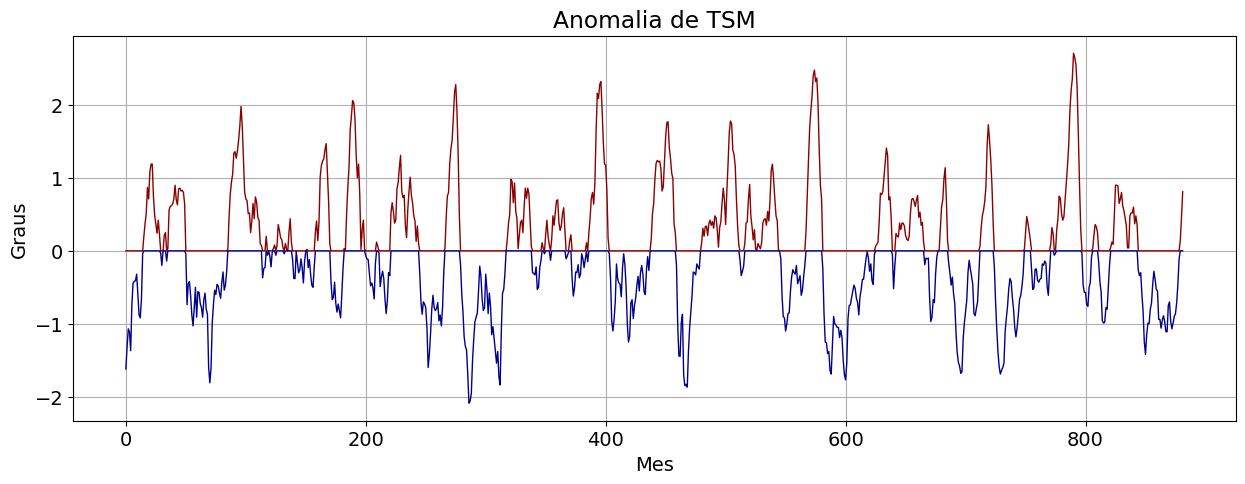

In [6]:
plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 14})
#plt.plot(meses, df['ANOM'], color='darkred', lw=2, ls='-')
plt.plot(meses, tsm_pos, color='darkred', lw=1, ls='-')
plt.plot(meses, tsm_neg, color='darkblue', lw=1, ls='-')
plt.title('Anomalia de TSM')
plt.xlabel('Mes')
plt.ylabel('Graus')
plt.grid()